In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def agnes(X, k):
    n = X.shape[0]
    clusters = [[i] for i in range(n)]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distances[i][j] = distance(X[i], X[j])
            distances[j][i] = distances[i][j]
    num_clusters = n
    while num_clusters > k:
        min_distance = float('inf')
        for i in range(num_clusters):
            for j in range(i+1, num_clusters):
                if distances[clusters[i][0]][clusters[j][0]] < min_distance:
                    min_distance = distances[clusters[i][0]][clusters[j][0]]
                    merge_index = (i, j)
        new_cluster = clusters[merge_index[0]] + clusters[merge_index[1]]
        clusters.pop(merge_index[1])
        clusters.pop(merge_index[0])
        clusters.append(new_cluster)
        num_clusters -= 1
    return clusters

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10],[11,12],[13,14],[15,16],[17,18],[19,20]])
k = 2
clusters = agnes(X, k)
print(clusters)

[[0, 1, 2, 3], [8, 9, 4, 5, 6, 7]]


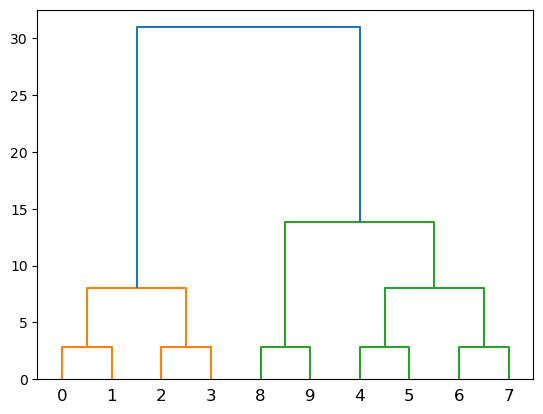

In [4]:
linkage_data = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()